In [1]:
%matplotlib inline
import h5py
import numpy as np
import pygad as pg
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

reading units definitions from "units.cfg"
reading config file "gadget.cfg"
reading config file "/home/sapple/.config/pygad/derived.cfg"
imported pygad 0.10.0


In [10]:
model = 'm100n1024'
wind = 's50'
snap = '151'
line = 'H1215'
vel_range = 600. # km/s
spectrum_dir = f'/disk01/sapple/cgm/absorption/ml_project/data/{model}_{wind}_{snap}_old/'
sample_file = f'/disk01/sapple/cgm/absorption/ml_project/data/samples/{model}_{wind}_{snap}_galaxy_sample.h5'

In [15]:
with h5py.File(sample_file, 'r') as sample:
    gal_sm = sample['mass'][:]
    gal_sfr = sample['sfr'][:]
    gal_fgas = sample['gas_frac'][:]
    gal_vpos = sample['vgal_position'][:]
    gal_ids = sample['gal_ids'][:]
    print(sample.keys())
gal_fgas[gal_fgas == 0] = 1e-3

<KeysViewHDF5 ['gal_ids', 'gas_frac', 'halo_pos', 'halo_r200', 'mass', 'position', 'sfr', 'ssfr', 'vgal_position']>


In [16]:
gal_ids

array([ 7457,  7747,  6899,  8958,  9473,  9832,  9451,  8704,  5946,
        8174,  8445,  9264,  8318,  9586,  9069,  9563,  9904,  8293,
        6478,  7288,  6534,  6017,  6607,  9820,  8402,  6174,  7246,
        7488,  8795,  8568,  9488,  7617,  7329,  8302, 10137,  6365,
        3842,  4801,  4750,  4513,  4288,  3456,  4950,  5120,  3338,
        5035,  3864,  5258,  4041,  3608,  4661,  4417,  5556,  4156,
        4117,  5599,  5405,  4071,  3409,  3889,  4573,  4515,  4552,
        4412,  3992,  4159,  3748,  5796,  3879,  3428,  3537,  3482,
        2497,  2023,  1820,  1977,  1996,  3124,  2410,  2279,  3214,
        1955,  1983,  3226,  2846,  2845,  3200,  2667,  1728,  1795,
        2193,  2214,  1748,  3106,  3086,  2594,  2335,  1880,  3142,
        3029,  2168,  2140,  2110,  1828,  2534,  1777,  1707,  2421,
        1650,  1401,  1509,  1209,  1101,  1068,   825,  1209,  1353,
        1289,  1336,  1474,  1142,  1521,  1572,  1042,   801,  1075,
         853,  1549,

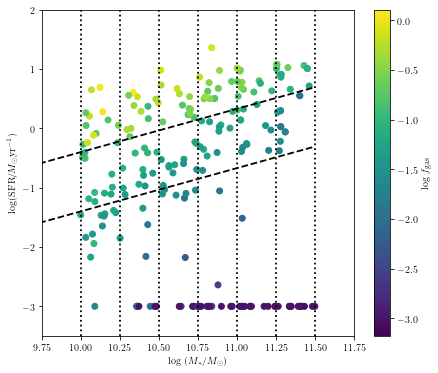

In [12]:
def sfms_line(mstar, a=0.73, b=-7.7):
    # The definition of the SFMS from Belfiore+18 is:
    # log (SFR/Msun/yr) = 0.73 log (Mstar/Msun) - 7.33
    # With a scatter of sigma = 0.39 dex
    return mstar*a + b

delta_m = 0.25
nbins_m = 6
min_m = 10.
sm_line = np.arange(9.5, 12., 0.5)
sf_line = sfms_line(sm_line)
q_line = sfms_line(sm_line, b=-8.7)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
plt.plot(sm_line, sf_line, ls='--', lw=1.8, c='k')
plt.plot(sm_line, q_line, ls='--', lw=1.8, c='k')
for i in range(nbins_m + 1):
    plt.axvline(min_m+i*delta_m, ls=':', lw=1.8, c='k')
plt.scatter(gal_sm, np.log10(gal_sfr + 1e-3), c=np.log10(gal_fgas))
plt.xlim(9.75,11.75)
plt.ylim(-3.5, 2.)
plt.xlabel(r'$\log\ (M_{*} / M_{\odot})$')
plt.ylabel(r'$\textrm{log} ({\rm SFR} / M_{\odot}{\rm yr}^{-1})$')
plt.colorbar(label=r'${\rm log}\ f_{\rm gas}$')

In [22]:
gal = gal_ids[3]
vgal = gal_vpos[3][2]
spectrum_file = f'{spectrum_dir}sample_galaxy_{gal}_0.25_r200_0_deg.h5'

sf = h5py.File(spectrum_file, 'r')
sf.keys()

<KeysViewHDF5 ['CIV1548_col_densities', 'CIV1548_flux', 'CIV1548_flux_conv', 'CIV1548_flux_conv_noise', 'CIV1548_flux_conv_noise_contin', 'CIV1548_flux_nonperiodic', 'CIV1548_noise', 'CIV1548_tau', 'CIV1548_tau_nonperiodic', 'CIV1548_temp', 'CIV1548_wavelength', 'H1215_col_densities', 'H1215_flux', 'H1215_flux_conv', 'H1215_flux_conv_noise', 'H1215_flux_conv_noise_contin', 'H1215_flux_nonperiodic', 'H1215_noise', 'H1215_tau', 'H1215_tau_nonperiodic', 'H1215_temp', 'H1215_wavelength', 'MgII2796_col_densities', 'MgII2796_flux', 'MgII2796_flux_conv', 'MgII2796_flux_conv_noise', 'MgII2796_flux_conv_noise_contin', 'MgII2796_flux_nonperiodic', 'MgII2796_noise', 'MgII2796_tau', 'MgII2796_tau_nonperiodic', 'MgII2796_temp', 'MgII2796_wavelength', 'NeVIII770_col_densities', 'NeVIII770_flux', 'NeVIII770_flux_conv', 'NeVIII770_flux_conv_noise', 'NeVIII770_flux_conv_noise_contin', 'NeVIII770_flux_nonperiodic', 'NeVIII770_noise', 'NeVIII770_tau', 'NeVIII770_tau_nonperiodic', 'NeVIII770_temp', 'NeVII

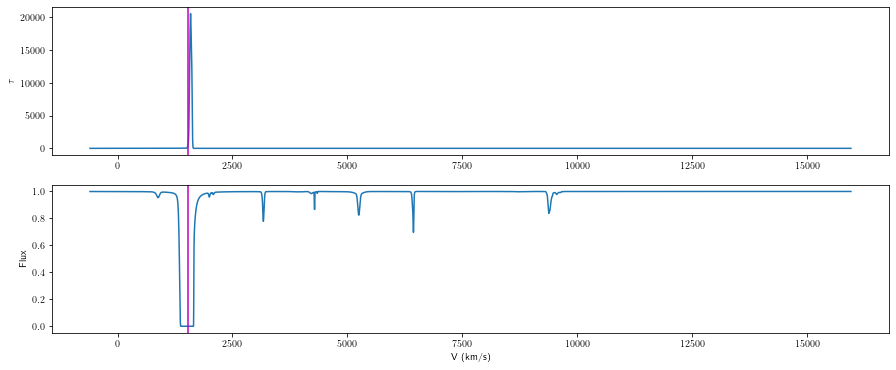

In [23]:
velocity = sf['velocity'][:]
wave = sf[f'{line}_wavelength'][:]
flux = sf[f'{line}_flux'][:]
noise = sf[f'{line}_noise'][:]
tau = sf[f'{line}_tau'][:]

fig, ax = plt.subplots(2, 1, figsize=(15, 6))
ax[0].plot(velocity, tau)
ax[0].set_ylabel(r'$\tau$')
ax[0].axvline(vgal, c='m')
ax[1].plot(velocity, flux)
ax[1].set_ylabel('Flux')
ax[1].set_xlabel('V (km/s)')
ax[1].axvline(vgal, c='m')

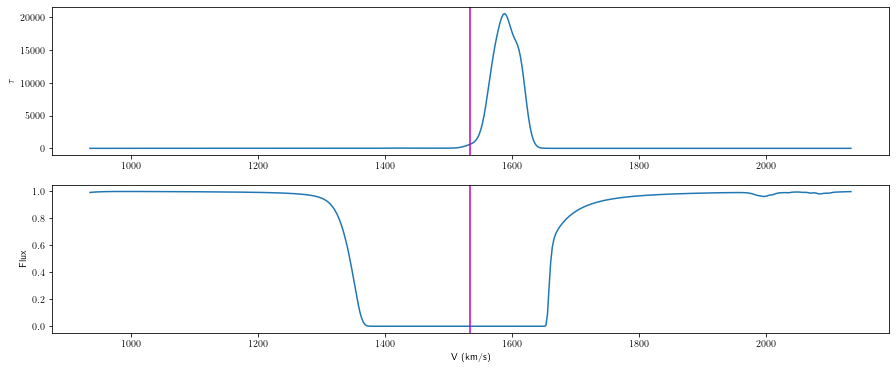

In [24]:
vel_mask = (velocity > vgal - vel_range) & (velocity < vgal + vel_range) 

fig, ax = plt.subplots(2, 1, figsize=(15, 6))
ax[0].plot(velocity[vel_mask], tau[vel_mask])
ax[0].set_ylabel(r'$\tau$')
ax[0].axvline(vgal, c='m')
ax[1].plot(velocity[vel_mask], flux[vel_mask])
ax[1].set_ylabel('Flux')
ax[1].set_xlabel('V (km/s)')
ax[1].axvline(vgal, c='m')

In [27]:
line_list = pg.analysis.fit_profiles(line, wave[vel_mask], flux[vel_mask]+noise[vel_mask], noise[vel_mask], chisq_lim=2.0, max_lines=7, logN_bounds=[12,17], b_bounds=[3,100], mode='Voigt')

Found 4 detection regions
Region 0: 1 lines gives chisq=0.72037 (2) after 22 iters
region 0 (1220.18-1220.3): chisq= 0.72037 with 1 lines
Region 1: 1 lines gives chisq=4.38374 (2) after 29 iters
Region 1: 2 lines gives chisq=1.98452 (2) after 72 iters
region 1 (1220.27-1222): chisq= 1.98452 with 2 lines
Region 2: 1 lines gives chisq=0.855983 (2) after 53 iters
region 2 (1221.95-1222.1): chisq= 0.855983 with 1 lines
Region 3: 1 lines gives chisq=0.556778 (2) after 31 iters
region 3 (1222.07-1222.16): chisq= 0.556778 with 1 lines


In [28]:
line_list

{'region': array([0., 1., 1., 2., 3.]),
 'l': array([1220.24033121, 1221.11263776, 1221.88631343, 1221.94769816,
        1222.13043389]),
 'dl': array([0.01720556, 0.0107765 , 0.04531718, 0.07556535, 0.01570264]),
 'b': array([13.47962822, 63.08522068, 22.81959679, 32.87405044,  9.69638244]),
 'db': array([10.90395734,  6.16062636, 36.17685355,  0.08528508,  7.75870658]),
 'N': array([12.00675716, 16.55472078, 12.63595974, 12.65373647, 12.01201138]),
 'dN': array([0.3566463 , 0.47588245, 0.61012249, 0.19209976, 0.27853216]),
 'EW': array([0.00459278, 1.31987114, 0.02086476, 0.01078008, 0.00365214])}

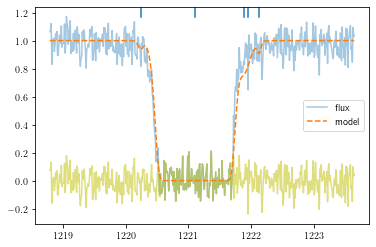

In [30]:
fig, ax = plt.subplots(1, 1)
model_flux, N, dN, b, db, l, dl, EW = pg.analysis.plot_fit(ax, wave[vel_mask], flux[vel_mask]+noise[vel_mask], noise[vel_mask], line_list, line)